In [1]:
%matplotlib inline


# Multi-output Decision Tree Regression


An example to illustrate multi-output regression with decision tree.

The :ref:`decision trees <tree>`
is used to predict simultaneously the noisy x and y observations of a circle
given a single underlying feature. As a result, it learns local linear
regressions approximating the circle.

We can see that if the maximum depth of the tree (controlled by the
`max_depth` parameter) is set too high, the decision trees learn too fine
details of the training data and learn from the noise, i.e. they overfit.


Automatically created module for IPython interactive environment


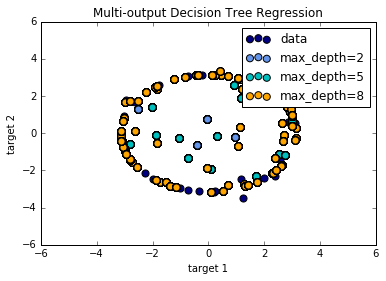

In [2]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(100, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y[::5, :] += (0.5 - rng.rand(20, 2))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

# Predict
X_test = np.arange(-100.0, 100.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

# Plot the results
plt.figure()
s = 50
plt.scatter(y[:, 0], y[:, 1], c="navy", s=s, label="data")
plt.scatter(y_1[:, 0], y_1[:, 1], c="cornflowerblue", s=s, label="max_depth=2")
plt.scatter(y_2[:, 0], y_2[:, 1], c="c", s=s, label="max_depth=5")
plt.scatter(y_3[:, 0], y_3[:, 1], c="orange", s=s, label="max_depth=8")
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Multi-output Decision Tree Regression")
plt.legend()
plt.show()